# Gráficos 

vamos aprender as ferramentas de Python para graficar dados numéricos

O principal pacote de gráficos que vamos usar é o matplotlib:

http://matplotlib.org/

este pacote apresenta inúmeras facilidades, em particular sua galeria de gráficos:

http://matplotlib.org/gallery.html

Nesta galeria são encontrados exemplos dos mais variados tipos de gráficos com o código fonte para uso

três tipos de gráficos são especialmente úteis em física: gráficos de linha , gráficos de dispersão e gráficos de densidade (tipo curvas de nível ou contornos)

no caso de gráficos, em geral é mais úti importar toda a biblioteca de rotinas:

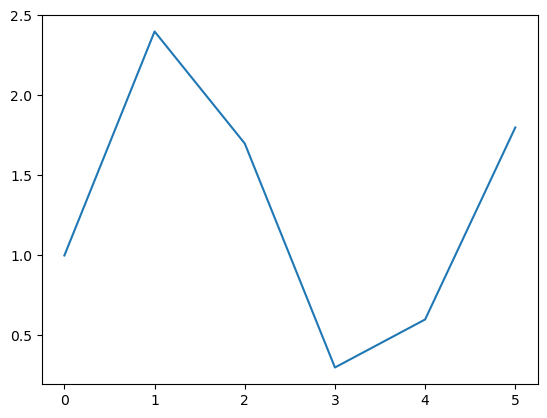

In [1]:
# essa instrução faz com que os gráficos apareçam no notebook
%matplotlib inline    

import matplotlib.pyplot as plt

y = [ 1.0, 2.4, 1.7, 0.3, 0.6, 1.8 ]
plt.plot(y)
plt.show()


Matplotlib representa graficamente seus dados em "Figures" (por exemplo, janelas, widgets Jupyter, etc.), cada um dos quais pode conter um ou mais "Axes", uma área onde os pontos podem ser especificados em termos de coordenadas x-y (ou theta-r em um gráfico polar, xyz em um gráfico 3D, etc.). A maneira mais simples de criar uma figura com eixos é usando "pyplot.subplots". Podemos então usar Axes.plot para desenhar alguns dados nos eixos, como mostrado acima.

# Partes de Uma figura

Aqui estão os componentes de uma figura Matplotlib

![](https://matplotlib.org/stable/_images/anatomy.png)

## Figure
A figura inteira . A Figura mantém registro de todos os filhos Axes, um grupo de artistas 'especiais' (títulos, legendas de figuras, barras de cores, etc.) e até mesmo subfiguras aninhadas.

A maneira mais fácil de criar uma nova figura é com pyplot:

```python
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

```

Muitas vezes é conveniente criar os Eixos junto com a Figura, mas você também pode adicionar Eixos manualmente mais tarde. Observe que muitos back-ends Matplotlib suportam zoom e panorâmica em janelas de figuras.

Para obter mais informações sobre Figuras, consulte Introdução às Figuras (https://matplotlib.org/stable/users/explain/figure/figure_intro.html#figure-intro).

## Axes
Um Eixo é um Artista anexado a uma Figura que contém uma região para plotagem de dados e geralmente inclui dois (ou três no caso de 3D) objetos "Axis" (esteja ciente da diferença entre "Axes" e "Axis" ) que fornecem marcações e rótulos de marcações para fornecer escalas para os dados nos eixos. Cada um "Axes" também tem um título (definido via set_title()), um rótulo x (definido via set_xlabel()) e um rótulo y definido via set_ylabel()).

## Axis
Esses objetos definem a escala e os limites e geram ticks (as marcas no Eixo) e ticklabels (strings que rotulam os ticks). A localização dos ticks é determinada por um objeto Locator e as strings ticklabel são formatadas por um objeto Formatter. A combinação correto Locator e Formatter fornece um controle muito preciso sobre os locais e rótulos dos ticks.

## Artist
Basicamente, tudo o que é visível na Figura é um "Artist" (ate mesmo os objetos "Figure", "Axes" e "Axis"). Isso inclui objetos "Text", "Line2D", "collections", "Patch", etc. Quando a Figura é renderizada, todos os Artistas são levados para a tela . A maioria dos Artistas está ligada a um "Axes"; tal Artista não pode ser compartilhado por vários "Axes" ou movido de um para outro.

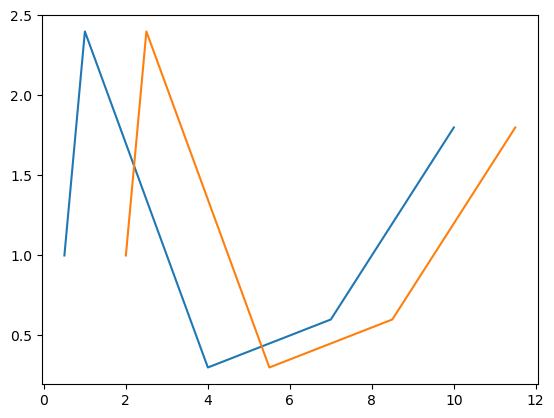

In [2]:
# em geral teremos dados em x e y

import matplotlib.pyplot as plt
import numpy as np

x = [ 0.5, 1.0, 2.0, 4.0, 7.0, 10.0 ]
y = [ 1.0, 2.4, 1.7, 0.3, 0.6, 1.8 ]
plt.plot(x,y)
plt.plot(np.array(x)+1.5,y)
plt.show()


o uso de **plt.show()** pode ser necessário para mostrar o grafico a depender do ambiente sendo usado. Python usa essa estratégia para facilitar a plotagem de varios graficos

No exemplo abaixo, o gráfico é plotado em uma janela fora do notebook. Este é o procedimento padrão em Python. 

A janela permite controlar outros atributos dos gráficos

In [3]:
%matplotlib

import matplotlib.pyplot as plt

x = [ 0.5, 1.0, 2.0, 4.0, 7.0, 10.0 ]
y = [ 1.0, 2.4, 1.7, 0.3, 0.6, 1.8 ]
plt.plot(x,y)
plt.show()


Using matplotlib backend: <object object at 0x72b08f32a0b0>


vejamos um exemplo mais interessante onde plotamos uma dada função

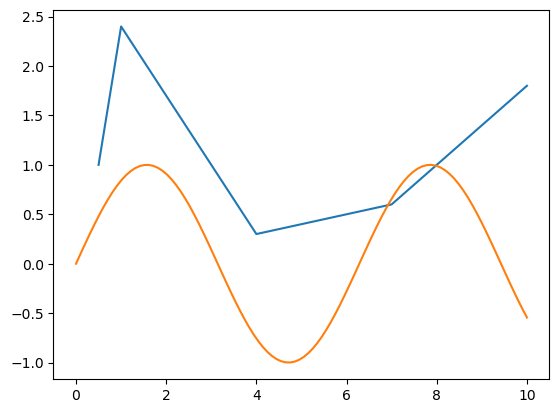

In [4]:
%matplotlib inline    

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)       # cria um array com 100 elemntos de 0 a 10
y = np.sin(x)

plt.plot(x,y)
plt.show()


Observe como usamos a função linspace do numpy para gerar um array de valores de x, e a função seno do numpy, que é uma versão especial que trabalha com arrays, calculando o seno de cada elemento

note que o grafico não é uma curva somente. Calculamos o seno de 100 pontos, plotamos estes pontos e a função plot traça uma linha conectando-os


## lendo dados de um arquivo

Uma das coisas mais comuns em física é a obtenção de dados experimentais que serão posteriormente analisados através de gráficos.

Python tem diversas ferramentas para lidar com esse tipo de situação

Caso se tenha os dados em um arquivo ascii simples, o método mais eficiente de importar os dados é usando a função **loadtxt** do numpy

A função **loadtxt** é muito flexível e tem diversas opções. Para mais detalhes vejam: http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

No entanto é razoavelmente inteligente para interpretar automaticamente os formatos de arquivos mais usuais

veja o exemplo abaixo:


(181, 2) <class 'numpy.ndarray'>


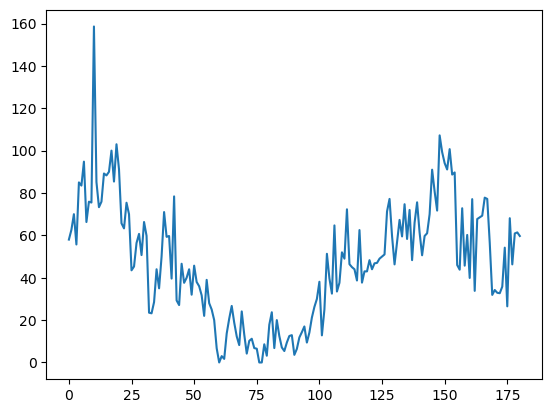

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# lendo o arquivo
data = np.loadtxt("dados.txt",float)

print(data.shape, type(data))

# alocando as variáveis
x = data[:,0]
y = data[:,1]

# plotando o gráfico
plt.plot(x,y)
plt.show()


poderíamos ter feito a mesma coisa sem definir novas variáveis:

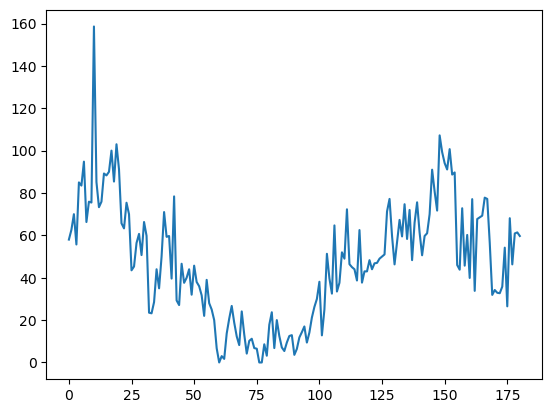

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# lendo o arquivo
data = np.loadtxt("dados.txt",float)

plt.plot(data[:,0],data[:,1])
plt.show()


Uma técnica interessante que pode ser feita em Python para construção de gráficos é o uso de listas que vão sendo atualizadas a medida que se executam os cálculos.

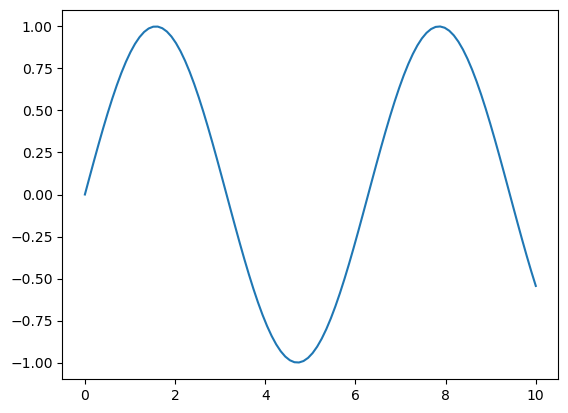

In [7]:
%matplotlib inline    

import matplotlib.pyplot as plt
import numpy as np

xpoints = []
ypoints = []

for x in np.linspace(0,10,100):
    xpoints.append(x)
    ypoints.append(np.sin(x))
    
plt.plot(xpoints,ypoints)
plt.show()


existem muitas opções para definir melhor os gráficos:

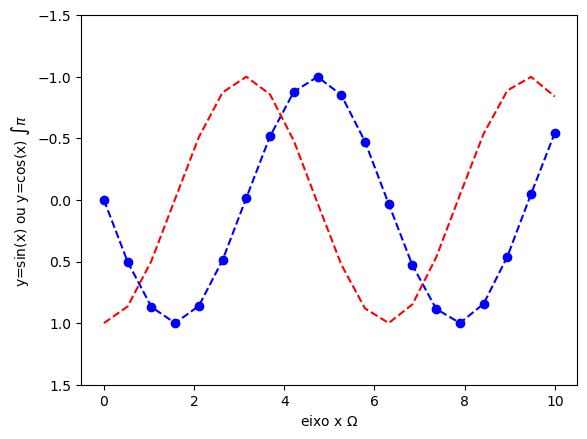

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,20)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1,"ob--")
plt.plot(x,y2,"r--")

plt.ylim(1.5,-1.5)

plt.xlabel("eixo x $\Omega$")
plt.ylabel("y=sin(x) ou y=cos(x) $\int \pi$")
plt.show()


como mostrado acima, podemos variar o estilo das linhas plotadas

para fazer isso um terceiro argumento é adicionado a instrução plot que é uma cadeia de caracteres

a primeira letra diz qual a cor a ser usada possibilidades são: r, g , b , c , m , Y , K , W e , para o vermelho , verde , azul, ciano , magenta, amarelo, preto, e branco, respectivamente.

o segundo caractere diz qual o tipo de linha deve ser usado:

| linestyle        |    descrição       |
| ---------------- |:------------------:|
|'-' or 'solid'	   |    solid line      |
|'--' or 'dashed'  |	dashed line     |
|'-.' or 'dash_dot'|	dash-dotted line|
|':' or 'dotted'   |	dotted line     |
|'None'	           |    draw nothing    |
|' '               |	draw nothing    |
|''	               | draw nothing       |




Muitas vezes não queremos plotar curvas do tipo y=f(x), mas um conjunto de dados experimentais onde ambos x e y foram medidos

para isso usamos os graficos do tipo scatter

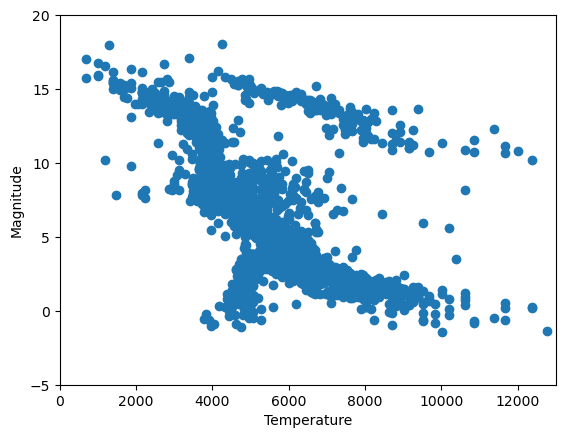

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("stars.txt",float)

x = data[:,0]
y = data[:,1]

plt.scatter(x,y)

plt.xlabel("Temperature")
plt.ylabel("Magnitude")

plt.xlim(0,13000)
plt.ylim(-5,20)

plt.show()


/home/hmonteiro/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


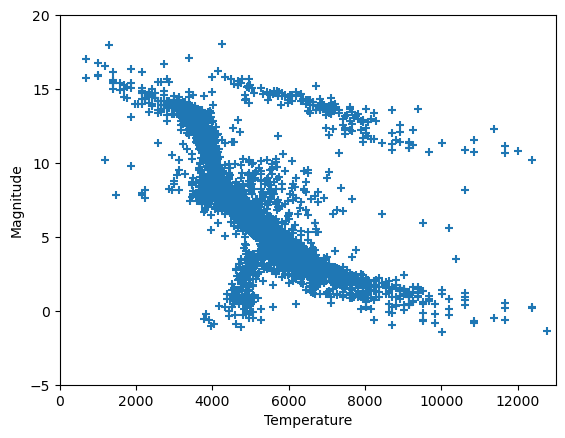

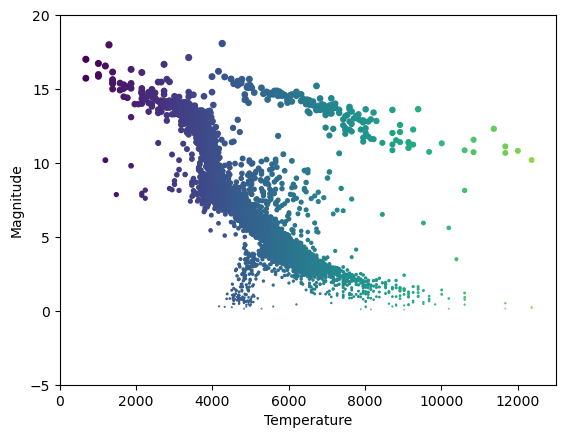

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("stars.txt",float)

x = data[:,0]
y = data[:,1]

plt.figure(1)
plt.scatter(x,y,marker='+')           # como mudar o simbolo com função scatter

plt.xlabel("Temperature")
plt.ylabel("Magnitude")

plt.xlim(0,13000)
plt.ylim(-5,20)

plt.figure(2)
#plt.scatter(x,y,marker='o',c=x)           # como mudar o simbolo com função scatter
#plt.scatter(x,y,marker='o',s=y)           # como mudar o simbolo com função scatter
plt.scatter(x,y,marker='o',s=y,c=x)           # como mudar o simbolo com função scatter

plt.xlabel("Temperature")
plt.ylabel("Magnitude")

plt.xlim(0,13000)
plt.ylim(-5,20)

plt.show()


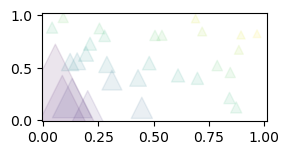

In [11]:
# capacidades interessantes da função scatter

import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(30)
y = np.random.rand(30)
prop1 = 50./(x**2 + y**2)
prop2 = np.sqrt(x**2 + y**2)

plt.subplot(321)
#plt.scatter(x,y)
plt.scatter(x, y, s=prop1, c=prop2, marker="^",alpha=0.1)


Outra função importante é imshow para mostrar imagens, em geral definidas por matrizes bidimensionais de dados

In [12]:
import matplotlib.pyplot as plt     # carrega as funções para gráficos do matplotlib
import numpy as np
import matplotlib.image as mpimg    # usado para importar uma imagem padrão do matplotlib

img=mpimg.imread('stinkbug.png')

print(type(img),img.shape, img.dtype)


<class 'numpy.ndarray'> (375, 500, 3) float32


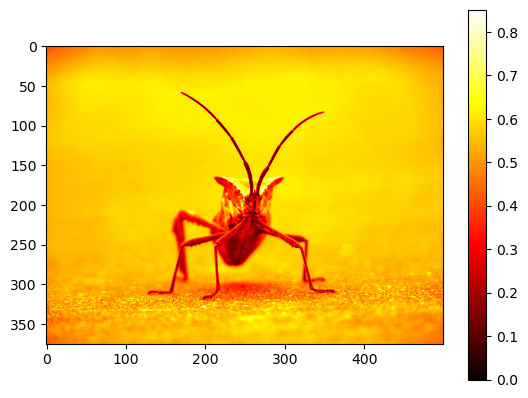

In [13]:
# para plotar a imagem usamos imshow
# como a imagem em princípio esta no formato RGB, temos 3 canais, por isso a forma do array é (375, 500, 3)

plt.imshow(img[:,:,0], cmap="hot")
plt.colorbar()

Um tipo de gráfico muito utilizado em física, especialmente experimental é o histograa. Veja abaixo um exemplo básico de como fazer este tipo de gráfico com python

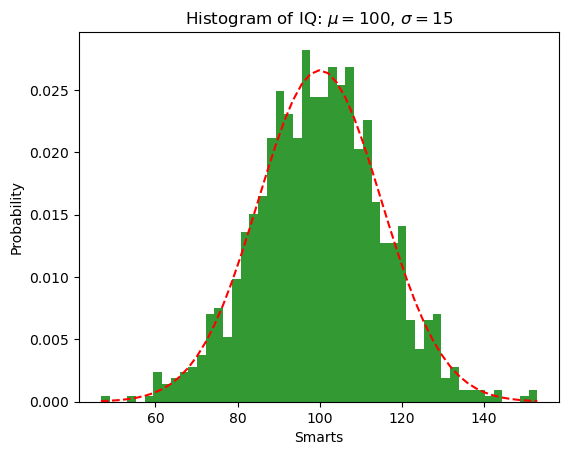

In [14]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dados de exemplo gerados aleatóriamente
mu = 100  # média da distribuição
sigma = 15  # desvio padrão da distribuição

x = mu + sigma * np.random.randn(1000) # amostragem da distribuição normal especificada

# numero de bins a serem usados no histograma
num_bins = 50 

# fazendo o histograma dos dados
n, bins, patches = plt.hist(x, num_bins, density=True, facecolor='green', alpha=0.8)

# mostre a distribuição gaussiana original
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

Outro tipo importante são gráficos onde mostramos os erros de um conjunto de medidas

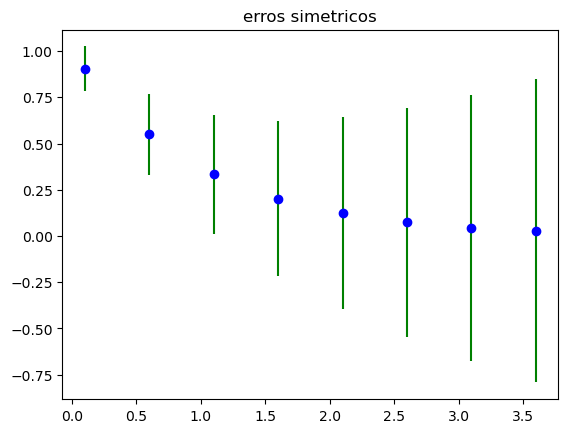

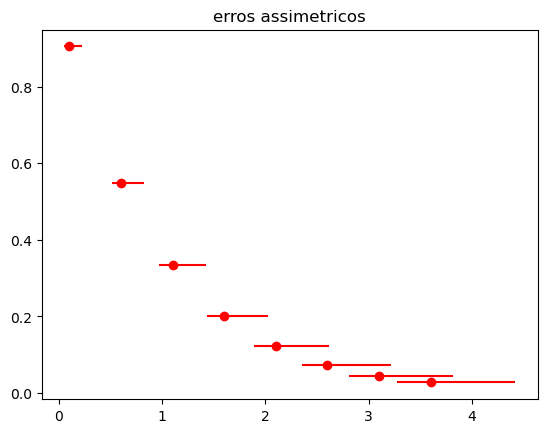

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# dados simulados
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# exemplo simulado de erros que variam com a variável x
error = 0.1 + 0.2 * x

# exemplo de erros assimétricos
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

plt.figure(1)
#plt.errorbar(x, y, yerr=error)
#plt.errorbar(x, y, yerr=error, fmt='-ob')
plt.errorbar(x, y, yerr=error,fmt='ob', ecolor='g', capthick=10)
plt.title('erros simetricos')

plt.figure(2)
plt.errorbar(x, y, xerr=asymmetric_error, fmt='or')
plt.title('erros assimetricos')
#plt.set_yscale('log')
plt.show()

(501, 501)


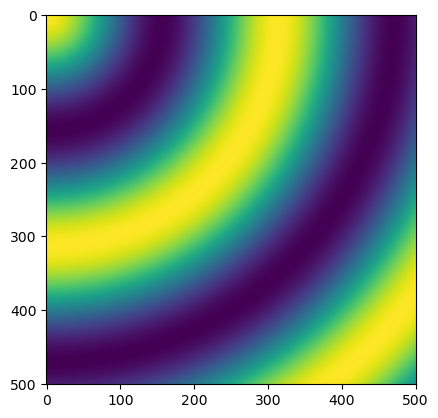

In [16]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("circular.txt",float)

print(data.shape)

plt.imshow(data)
plt.show()


Os gráficos com imshow podem ter diversas escalas de cor: jet, gray, hot, hsv, entre outros
    


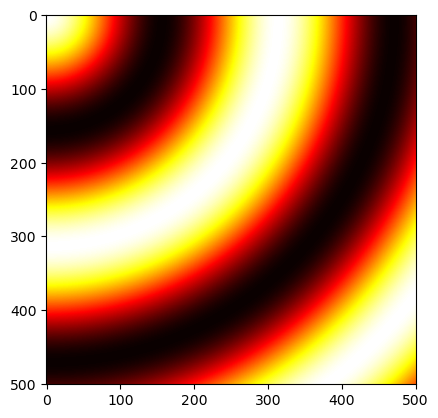

In [17]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("circular.txt",float)

plt.imshow(data,cmap='hot')
plt.show()


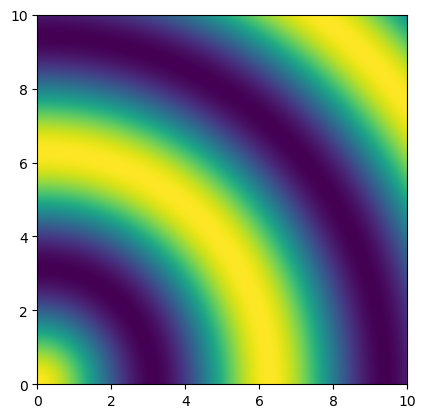

In [18]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("circular.txt",float)

# como mudar a origem e a escala do grafico
plt.imshow(data,origin="lower",cmap='viridis',extent=[0,10,0,10])
plt.show()


Veja o exercício na pag 109 do capitulo 3: http://www.umich.edu/~mejn/cp/chapters/graphics.pdf

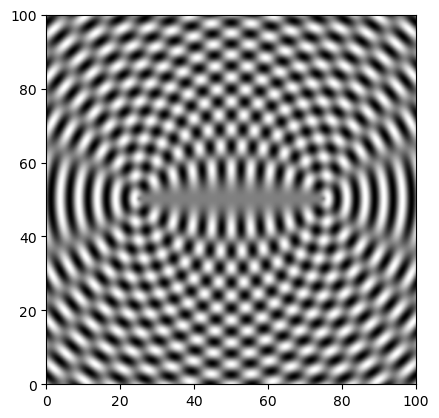

In [19]:
wavelength = 5.0
k = 2*np.pi/wavelength
xi0 = 1.0
separation = 50.0  # Separation of centers in cm
side = 100.0       # Side of the square in cm
points = 500       # Number of grid points along each side



spacing = side/points # Spacing of points in cm

# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Make an array to store the heights
xi = np.empty([points,points],float)

# Calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = np.sqrt((x-x1)**2+(y-y1)**2)
        r2 = np.sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0*np.sin(k*r1) + xi0*np.sin(k*r2)
    
# Make the plot
plt.imshow(xi,origin="lower",extent=[0,side,0,side])
plt.gray()
plt.show()


## Exercício

fazer o exercício 3.1 do cap. 3:  http://www.umich.edu/~mejn/cp/chapters/graphics.pdf

o arquivo de dados pode ser obtido do link: http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt

## Gáficos em 3D

Existem diversas maneiras de lidar com gráfico em 3D. Para um conjunto bem completo de exemplos de aplicação veja: https://matplotlib.org/stable/gallery/mplot3d/index.html


In [24]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')


[(-40.0, 40.0),
 (-40.0, 40.0),
 (-100.0, 100.0),
 Text(0.5, 0, 'X'),
 Text(0.5, 0.5, 'Y'),
 Text(0.5, 0, 'Z')]

In [27]:
%matplotlib 

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("circular.txt",float)
sz = data.shape

X = np.linspace(0, 10, sz[0])
Y = np.linspace(0, 10, sz[1])
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X,Y,data,rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))

plt.show()


Using matplotlib backend: QtAgg
